Importing libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.max_columns',None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Read the dataset

In [3]:
data = pd.read_csv('startup data.csv')

In [4]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [5]:
data['status']=data.status.map({'acquired':1,'operating':1,'closed':0})

In [6]:
data['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64

missing valuess

In [7]:
null=pd.DataFrame(data.isnull().sum(),columns=['null_count'])
null['% missinhg values']=(data.isna().sum()/len(data)*100)
null=null[null['null_count']>0]
null.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,null_count,% missinhg values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [8]:
data[['Unnamed: 6','state_code.1','closed_at','age_first_milestone_year','age_last_milestone_year','status']].head(4)

,Unnamed: 6,state_code.1,closed_at,age_first_milestone_year,age_last_milestone_year,status
0,NaN,CA,NaN,4.6685,6.7041,1
1,NaN,CA,NaN,7.0055,7.0055,1
2,San Diego CA 92121,CA,NaN,1.4575,2.2055,1
3,Cupertino CA 95014,CA,NaN,6.0027,6.0027,1


In [9]:
data['Unnamed: 6']=data.apply(lambda row: (row.city)+" "+(row.state_code)+" "+(row.zip_code),axis=1)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [10]:
data['closed_at']=data['closed_at'].fillna(value="31/12/2013")

In [11]:
data["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=False)

founded_at
20:1/    563
20:6/     43
20:8/     42
20:10     38
20:5/     36
20:9/     35
20:7/     31
20:3/     30
20:4/     30
20:2/     29
20:11     23
20:12     23
Name: count, dtype: int64

In [12]:
data["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

founded_at
20:1/    0.609967
20:6/    0.046587
20:8/    0.045504
20:10    0.041170
20:5/    0.039003
20:9/    0.037920
20:7/    0.033586
20:3/    0.032503
20:4/    0.032503
20:2/    0.031419
20:11    0.024919
20:12    0.024919
Name: proportion, dtype: float64

In [13]:
data["closed_at"].apply(lambda x: '20:' + x[-2:]).value_counts(normalize=True)

closed_at
20:13    0.737811
20:12    0.121343
20:11    0.053088
20:10    0.034670
20:09    0.030336
20:08    0.016251
20:07    0.003250
20:01    0.002167
20:05    0.001083
Name: proportion, dtype: float64

In [14]:
data[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [15]:
data['age_first_milestone_year']=data['age_first_milestone_year'].fillna(value="0")
data['age_last_milestone_year']=data['age_last_milestone_year'].fillna(value="0")

In [16]:
for index, row in data.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'],row['state_code.1'])

515 CA nan


In [17]:
data.drop(['state_code.1'],axis=1,inplace=True)

In [18]:
null=pd.DataFrame(data.isnull().sum(),columns=['null_count'])
null['% missinhg values']=(data.isna().sum()/len(data*100))
null=null[null['null_count']>0]
null.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,null_count,% missinhg values


duplictae value

In [19]:
duplicate = data[data.duplicated()]
print("duplicate row:")

duplicate row:


checking for negative values

In [20]:
data['age_first_milestone_year']=data.age_first_milestone_year.astype(float)
data['age_last_milestone_year']=data.age_last_milestone_year.astype(float)

In [21]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]
for a in range(len(age)):
    print("is there any negative value in '{}' column : {} ".format(age[a],len(data[data[age[a]]<0])))


is there any negative value in 'age_first_funding_year' column : 46 
is there any negative value in 'age_last_funding_year' column : 13 
is there any negative value in 'age_first_milestone_year' column : 46 
is there any negative value in 'age_last_milestone_year' column : 12 


In [22]:
data=data.drop(data[data.age_first_funding_year<0].index)
data=data.drop(data[data.age_last_funding_year<0].index)
data=data.drop(data[data.age_first_milestone_year<0].index)
data=data.drop(data[data.age_last_milestone_year<0].index)

In [23]:
for a in range(len(age)):
    print("is there any negative value in '{}' column : {} ".format(age[a],len(data[data[age[a]]<0])))

is there any negative value in 'age_first_funding_year' column : 0 
is there any negative value in 'age_last_funding_year' column : 0 
is there any negative value in 'age_first_milestone_year' column : 0 
is there any negative value in 'age_last_milestone_year' column : 0 


Outliers

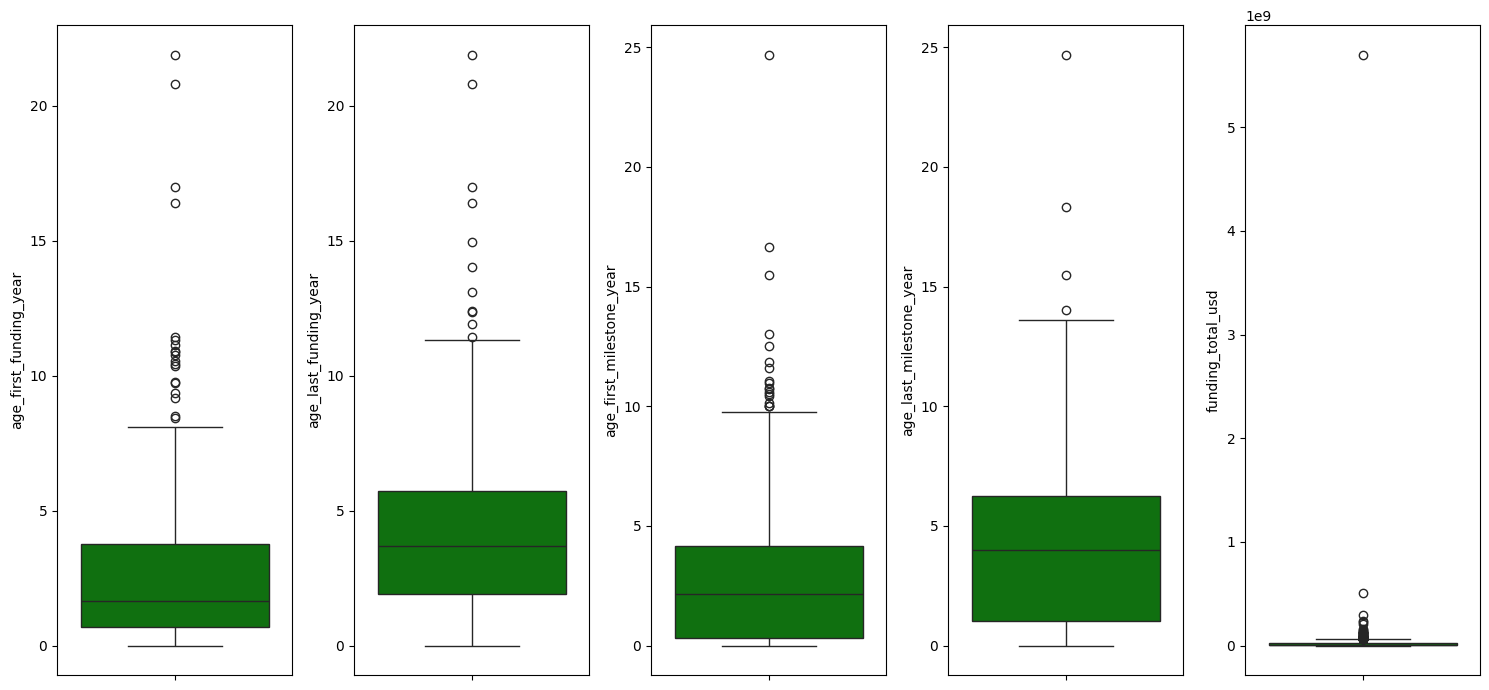

In [24]:
featuresNumfinal=['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']
plt.figure(figsize=(15,7))
for i in range(0,len(featuresNumfinal)):
    plt.subplot(1,len(featuresNumfinal),i+1)
    sns.boxplot(y=data[featuresNumfinal[i]],color='green',orient='v')
    plt.tight_layout()

In [25]:
data["age_first_funding_year"]= np.log1p(data["age_first_funding_year"])
data["age_last_funding_year"]=np.log1p(data["age_last_funding_year"])
data["age_first_milestone_year"]=np.log1p(data["age_first_milestone_year"])
data["age_last_milestone_year"]=np.log1p(data["age_last_milestone_year"])
data["funding_total_usd"]=np.log1p(data["funding_total_usd"])

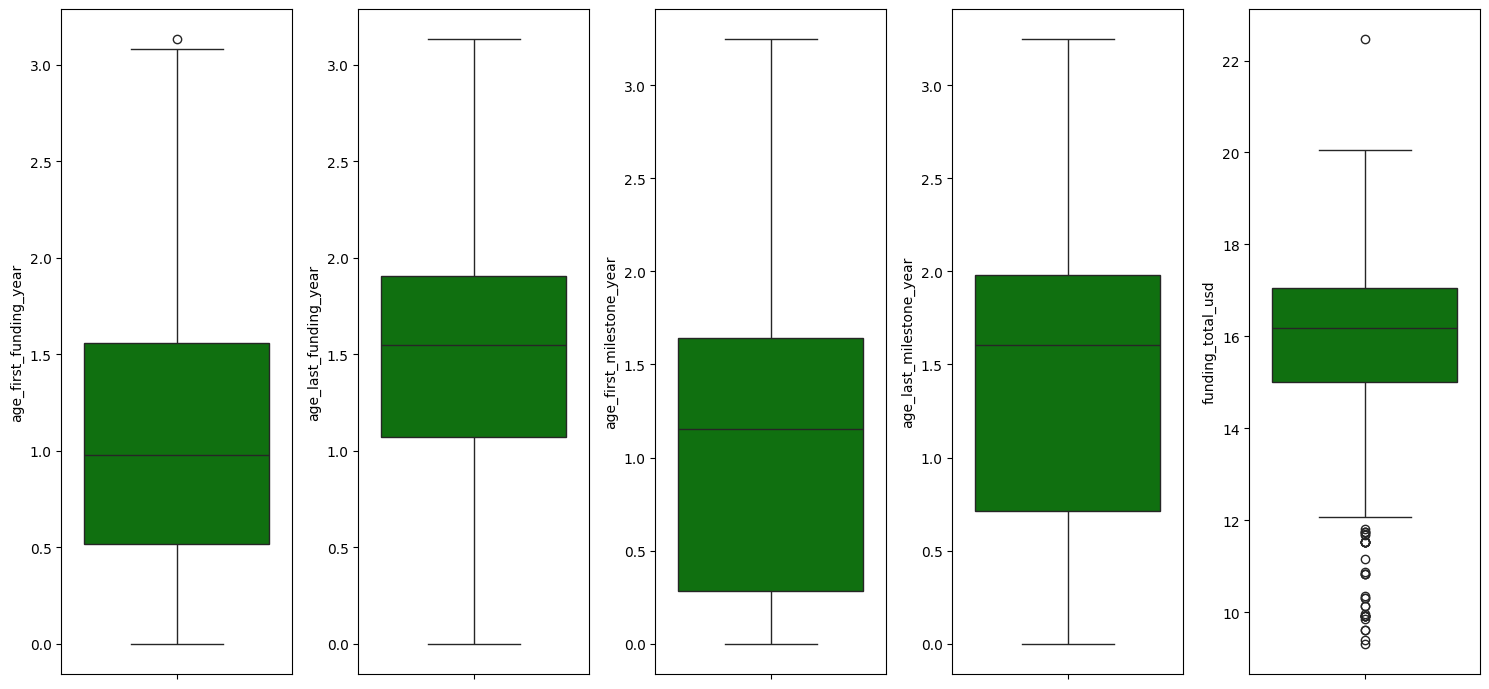

In [26]:
featuresNumfinal=['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']
plt.figure(figsize=(15,7))
for i in range(0,len(featuresNumfinal)):
    plt.subplot(1,len(featuresNumfinal),i+1)
    sns.boxplot(y=data[featuresNumfinal[i]],color='green',orient='v')
    plt.tight_layout()

Exploratory Data Analysis

Descriptive statistical

In [27]:
for index, row in data.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'],row['status'])

In [28]:
data.drop(['labels'],axis=1,inplace=True)

In [29]:
describeNum= data.describe(include=['float64','int64','float','int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,840.000000,570.323810,333.965519,1.000000,278.500000,575.000000,865.250000,1153.000000
latitude,840.000000,38.410522,3.689577,25.752358,37.386778,37.779281,40.730646,59.335232
longitude,840.000000,-103.766293,21.862099,-122.756956,-122.187927,-118.355788,-77.381456,18.057121
age_first_funding_year,840.000000,1.015180,0.647373,0.000000,0.519701,0.976890,1.559591,3.130958
age_last_funding_year,840.000000,1.464845,0.609871,0.000000,1.070830,1.549008,1.904969,3.130958
age_first_milestone_year,840.000000,1.059334,0.766397,0.000000,0.284276,1.151521,1.641789,3.245903
age_last_milestone_year,840.000000,1.352650,0.824112,0.000000,0.715821,1.606141,1.978262,3.245903
relationships,840.000000,7.752381,7.280069,0.000000,3.000000,5.500000,10.000000,63.000000
funding_rounds,840.000000,2.320238,1.404427,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,840.000000,15.835517,1.786871,9.305741,15.001589,16.170264,17.059044,22.463732


Visual Analysis

In [30]:
data['state']='other'
data.loc[(data['state_code']=='CA'),'state']='CA'
data.loc[(data['state_code']=='NY'),'state']='NY'
data.loc[(data['state_code']=='MA'),'state']='MA'
data.loc[(data['state_code']=='TX'),'state']='TX'
data.loc[(data['state_code']=='WA'),'state']='WA'

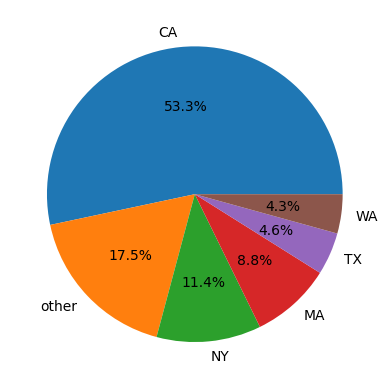

In [31]:
state_count=data['state'].value_counts()
plt.pie(state_count,labels= state_count.index,autopct='%1.1f%%')
plt.show()

In [32]:
data['category']='other'
data.loc[(data['category_code']=='software'),'category']='software'
data.loc[(data['category_code']=='web'),'category']='web'
data.loc[(data['category_code']=='mobile'),'category']='mobile'
data.loc[(data['category_code']=='enterprise'),'category']='enterprise'
data.loc[(data['category_code']=='advertising'),'category']='advertising'
data.loc[(data['category_code']=='games_video'),'category']='games_video'
data.loc[(data['category_code']=='semiconductor'),'category']='semiconductor'
data.loc[(data['category_code']=='network_hosting'),'category']='network_hosting'
data.loc[(data['category_code']=='biotech'),'category']='biotech'
data.loc[(data['category_code']=='hardware'),'category']='hardware'

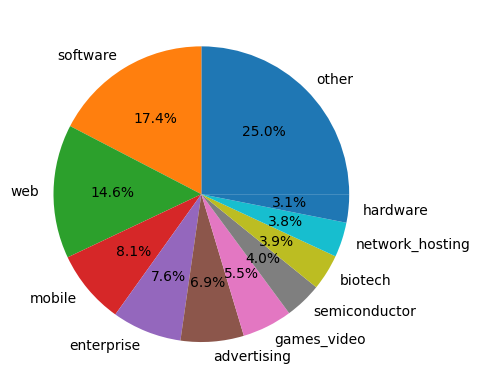

In [33]:
category_count=data['category'].value_counts()
plt.pie(category_count,labels= category_count.index,autopct='%1.1f%%')
plt.show()

Distribution of Status of Startup

In [34]:
prop_df=data.groupby('status').size().reset_index(name='counts')
prop_df['proportions']=prop_df['counts']/prop_df['counts'].sum()


Text(0.5, 1.0, 'Distribution of status of the startup')

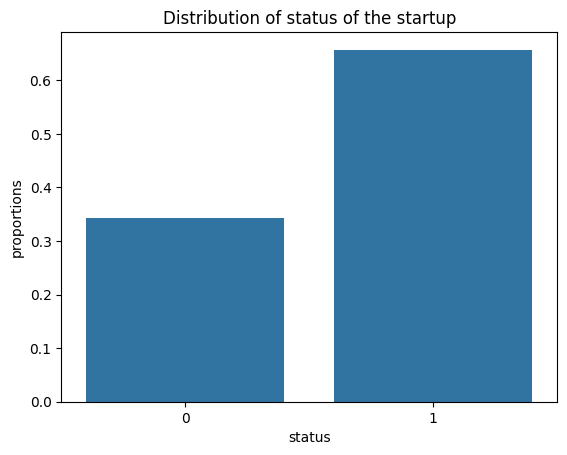

In [35]:
sns.barplot(data=prop_df,x='status',y='proportions')
plt.title('Distribution of status of the startup')

State Vs Status

Text(0.5, 1.0, 'State Vs Status')

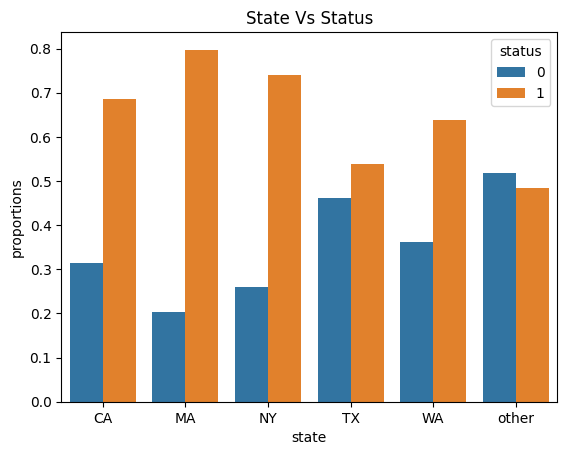

In [36]:
prop_df = data.groupby(['state', 'status'], group_keys=True).size().reset_index(name='count')
prop_df['proportions'] = prop_df['count'] / prop_df.groupby('state')['count'].transform('sum')
sns.barplot(data=prop_df, x='state', y='proportions', hue='status')
plt.title('State Vs Status')

State VS Category

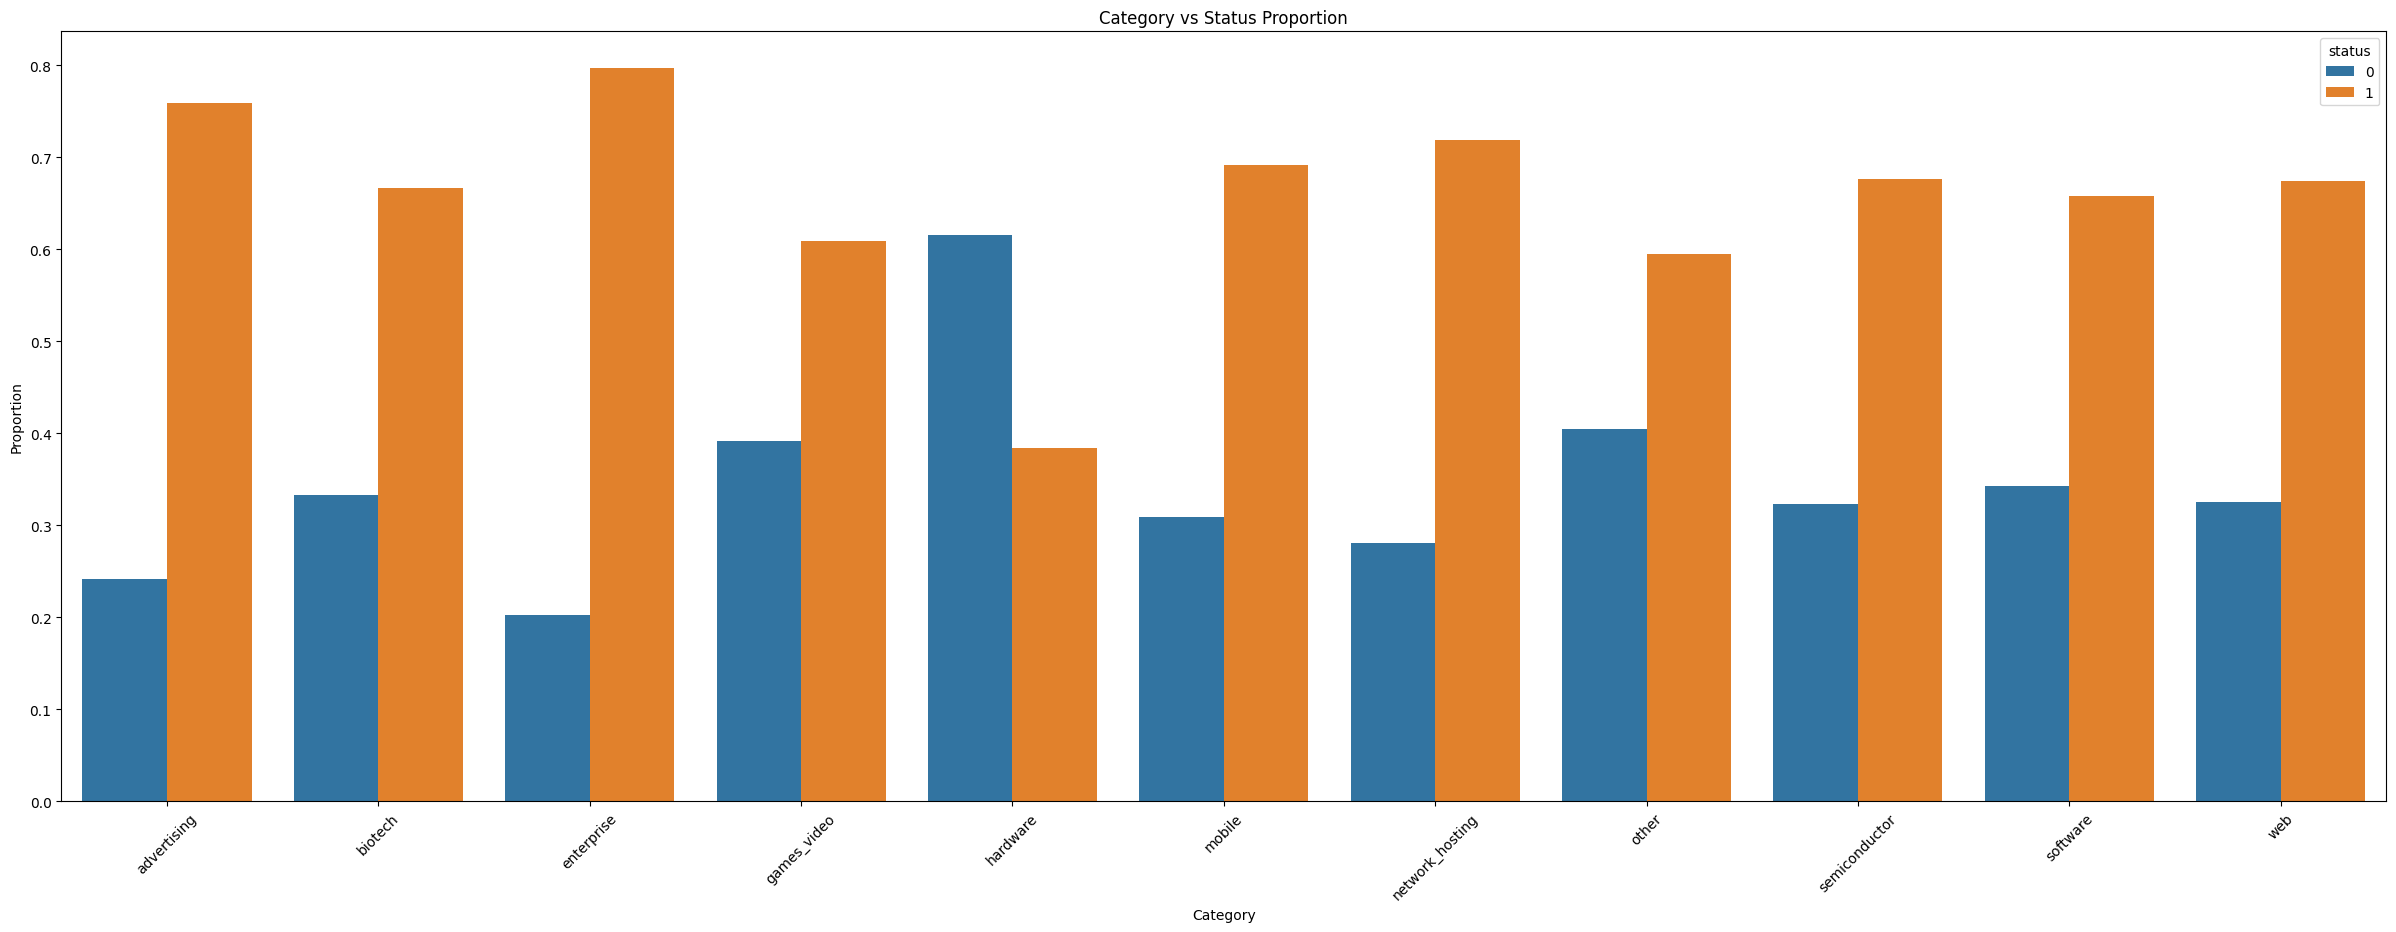

In [37]:
fig, ax = plt.subplots(figsize=(30, 10))
prop_df = data.groupby(['category', 'status']).size().reset_index(name='counts')
prop_df['proportions'] = prop_df['counts'] / prop_df.groupby('category')['counts'].transform('sum')
sns.barplot(data=prop_df, x='category', y='proportions', hue='status', ax=ax)
ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Category vs Status Proportion')
ax.tick_params(axis='x', rotation=45)
plt.show()

Category VS Founded-Year

In [38]:
cat_year = pd.crosstab(index = data['founded_at'], columns = data['category'])


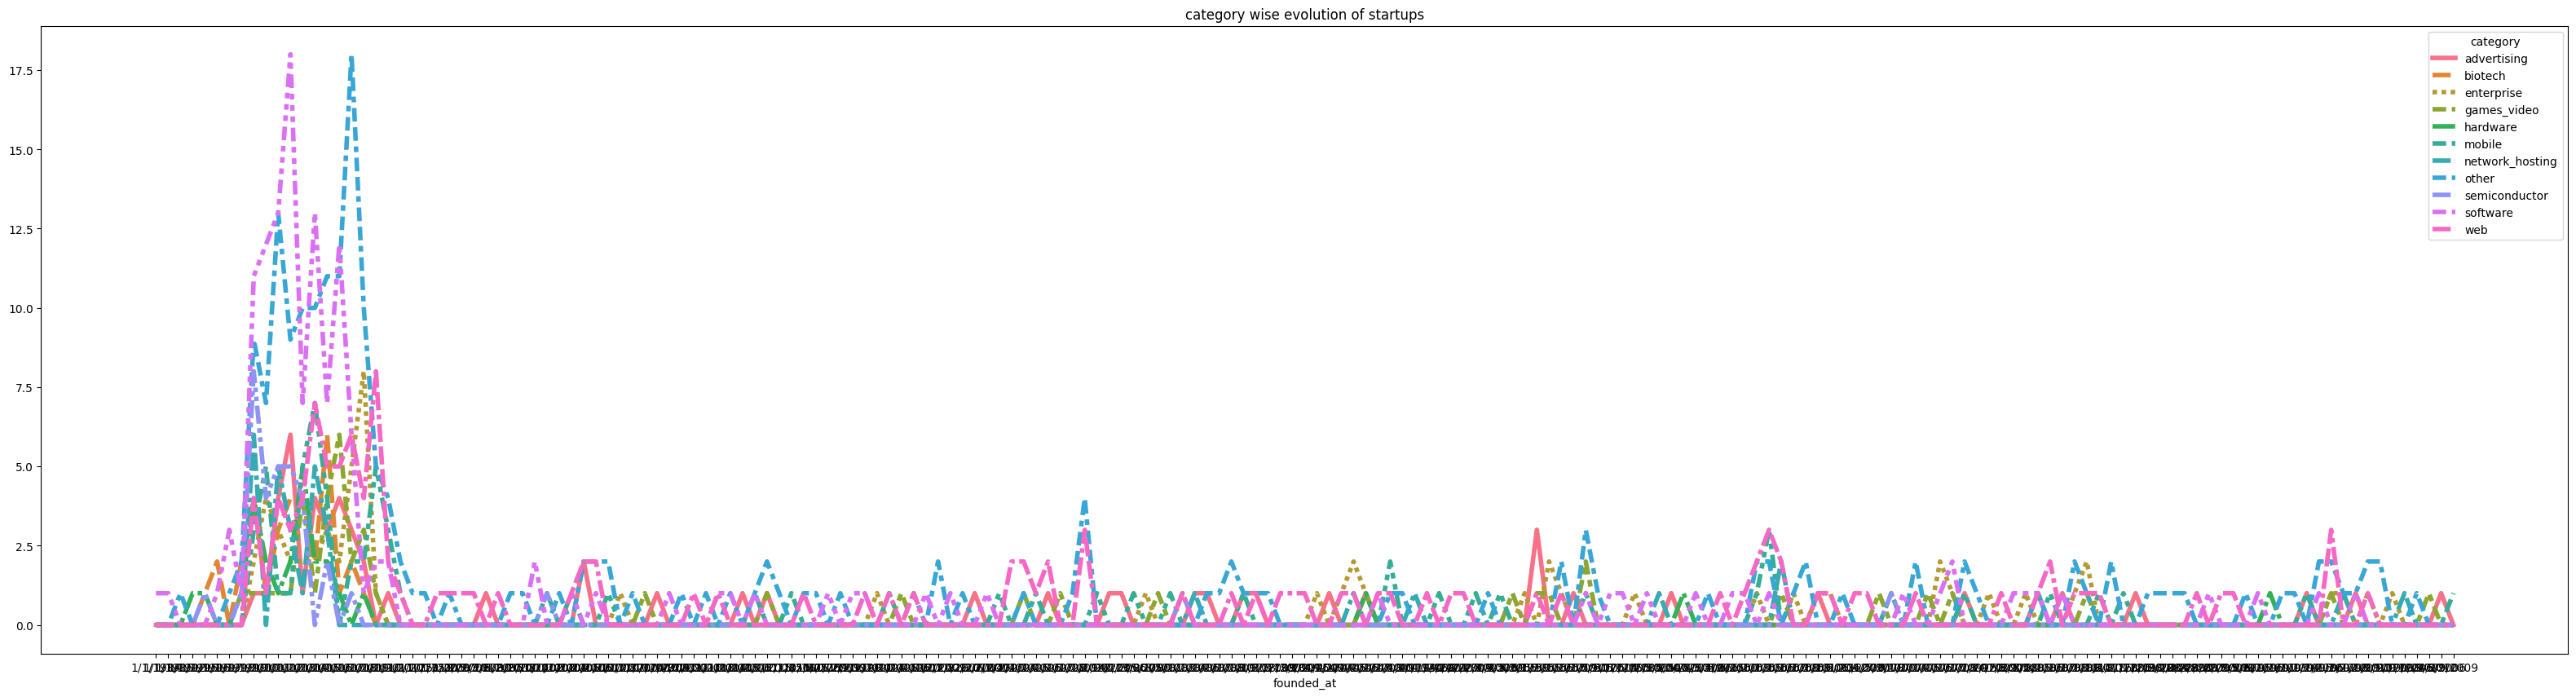

In [39]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(data=cat_year, lw=4, )
plt.title('category wise evolution of startups')
plt.show()

Founded- Year VS Total Funding

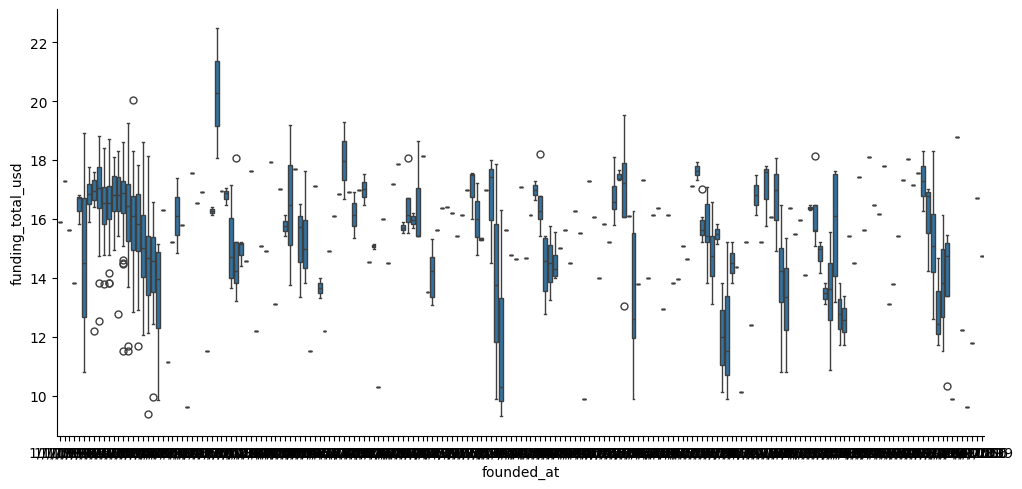

In [40]:
# Use the actual unique values in 'founded_at' for the order
order = sorted(data['founded_at'].unique())
sns.catplot(data=data, x='founded_at', y='funding_total_usd', kind='box', height=5, aspect=2, order=order)

Correlation Plot

<Axes: >

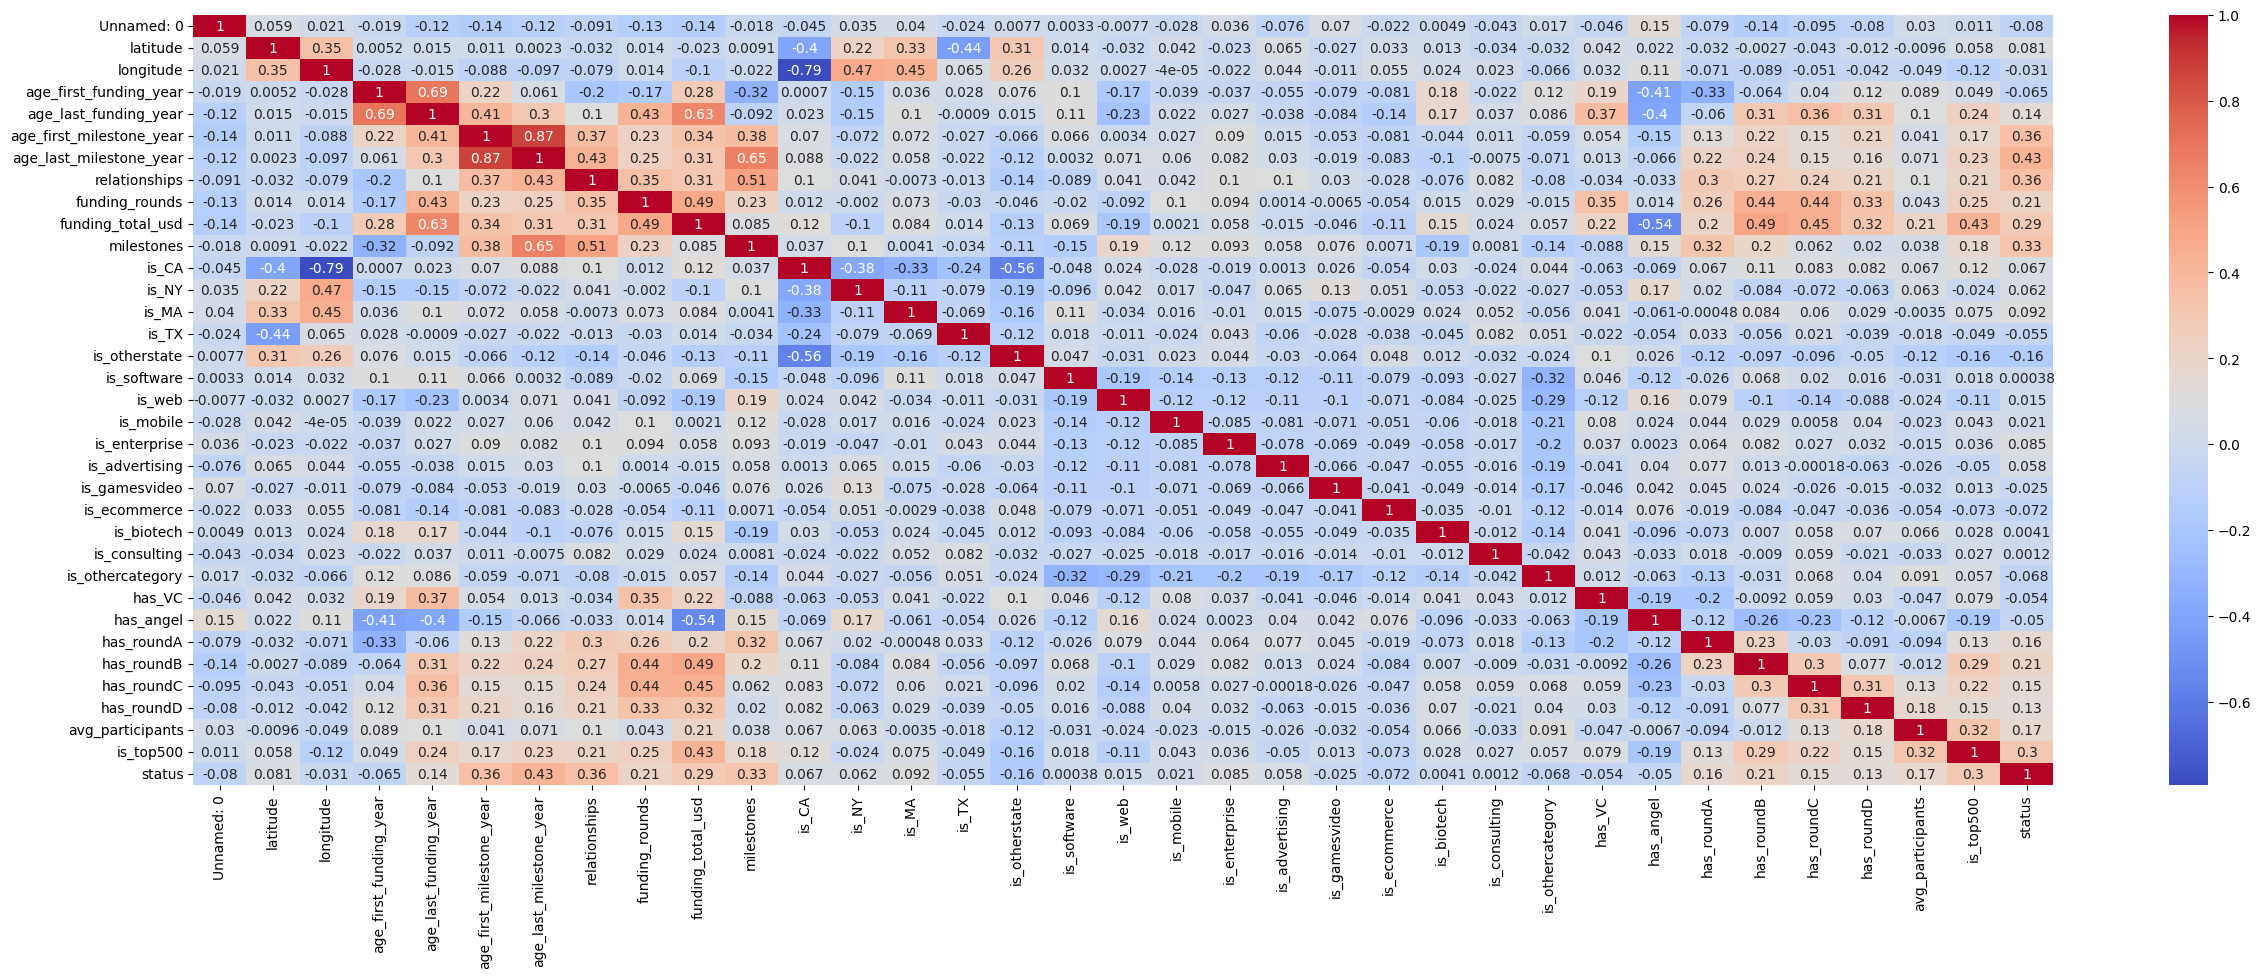

In [41]:
fig, ax = plt.subplots(figsize=(30, 10))
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr,cmap='coolwarm', annot=True,)

Reducing the Number of Categories

In [42]:
data.founded_at=pd.to_datetime(data.founded_at,errors='coerce')

data.closed_at=pd.to_datetime(data.closed_at,errors='coerce')

C:\Users\ABHI\AppData\Local\Temp\ipykernel_8972\1660364936.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data.closed_at=pd.to_datetime(data.closed_at,errors='coerce')


In [43]:
data['age_closed_startup']= data.apply(lambda row: (row.closed_at - row.founded_at), axis=1)

Dropping the Irrelevant Columns

In [44]:
data = data.drop(['category_code','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis=1)
data.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,state,category,age_closed_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,2007-01-01,2013-12-31,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2556 days
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,2000-01-01,2013-12-31,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,5113 days
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2013-12-31,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,1749 days
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,2013-12-31,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,4382 days
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-01-10,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,527 days


In [45]:
data = data.drop(['id','name','city','state_code','zip_code','founded_at','first_funding_at','last_funding_at','Unnamed: 6','object_id','Unnamed: 0','closed_at','latitude','longitude','age_closed_startup','state','category'],axis=1)
data.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,0,1,0,0,0,0,1.0000,0,1
1,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


Train-Test Split

In [46]:


# define feature matrix `x` and target `y`
# prefer `selected_features` if it's defined in a later cell, otherwise fall back to the expected numeric feature list
x = data.drop('status', axis=1)

y = data['status']

# split train and test set (stratify to preserve class proportions)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(672, 21)
(168, 21)
(672,)
(168,)


Model Building

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,precision_recall_curve,f1_score
import warnings
warnings.filterwarnings('ignore')

[LightGBM] [Info] Number of positive: 433, number of negative: 239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1113
[LightGBM] [Info] Number of data points in the train set: 672, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.644345 -> initscore=0.594274
[LightGBM] [Info] Start training from score 0.594274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


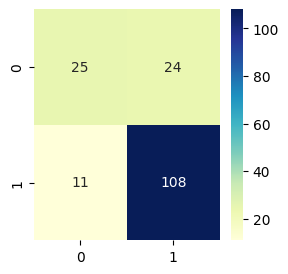

              precision    recall  f1-score   support

           0       0.69      0.51      0.59        49
           1       0.82      0.91      0.86       119

    accuracy                           0.79       168
   macro avg       0.76      0.71      0.72       168
weighted avg       0.78      0.79      0.78       168

------------------------------------------
ROC Curves              = 0.7088835534213686
Precision-Recall Curves = 0.8956105169340464


In [63]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()

clf.fit(x_train,y_train)

y_pred_lgb = clf.predict(x_test)

print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
Precision_Recall_lgbm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_lgbm)

Training Accuracy : 1.0
Testing Accuracy : 0.8095238095238095


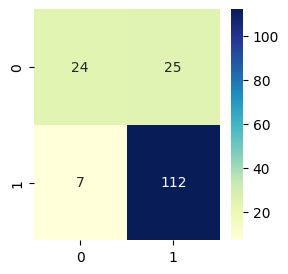

              precision    recall  f1-score   support

           0       0.77      0.49      0.60        49
           1       0.82      0.94      0.88       119

    accuracy                           0.81       168
   macro avg       0.80      0.72      0.74       168
weighted avg       0.80      0.81      0.79       168

------------------------------------------
ROC Curves              = 0.715486194477791
Precision-Recall Curves = 0.9001806927150422


In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)


y_pred_rf = rf.predict(x_test)

print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

Training Accuracy : 1.0
Testing Accuracy : 0.7678571428571429


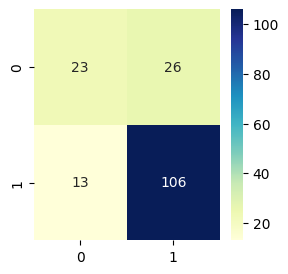

              precision    recall  f1-score   support

           0       0.64      0.47      0.54        49
           1       0.80      0.89      0.84       119

    accuracy                           0.77       168
   macro avg       0.72      0.68      0.69       168
weighted avg       0.76      0.77      0.76       168

------------------------------------------
ROC Curves              = 0.6800720288115246
Precision-Recall Curves = 0.8855837789661319


In [67]:
from xgboost import XGBClassifier

#train
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

#predict
y_predicted_xgb = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb.score(x_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

In [ ]:
"""rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=False)
grid_search.fit(x_train, y_train)
print("Best parameters : ", grid_search.best_params_)"""

Best parameters :  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [ ]:
"""model_rf=rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
cr_rf = classification_report(y_pred_rf,y_test)
print(confusion_matrix(y_pred_rf,y_test))
print(cr_rf)"""

[[ 21   9]
 [ 28 110]]
              precision    recall  f1-score   support

           0       0.43      0.70      0.53        30
           1       0.92      0.80      0.86       138

    accuracy                           0.78       168
   macro avg       0.68      0.75      0.69       168
weighted avg       0.84      0.78      0.80       168



In [ ]:
"""test_acc = accuracy_score(y_test,y_pred_rf)
train_acc = accuracy_score(y_train,model_rf.predict(x_train))
print("Test accuracy:", test_acc)
print("Train accuracy:", train_acc)"""

Test accuracy: 0.7797619047619048
Train accuracy: 1.0


Testing the Model 

for successful

In [68]:
print(rf.predict([[1.178440	,1.386969	,1.734925	,2.041753	,3	,3	,12.834684	,3	,1	,0	,0	,0	,0	,0	,1	,0	,0	,0	,0	,1.0000	,0]]))

[1]


for unsuccessful

In [69]:
print(rf.predict([[0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,1,1,0,0,0,0,1.0000,1]]))

[0]


Save the Model

In [70]:
%pip install joblib
import joblib

# save the trained model to a file
joblib.dump(rf,'random_forest_model.pkl')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


['random_forest_model.pkl']